--- 
Project Microeconometrics | Summer 2020, M.Sc. Economics, University of Bonn | [Vincent Selz](https://github.com/VincentSelz)

# Replication of “A Structural Analysis of Disappointment Aversion in a Real Effort Competition” by David Gill and Victoria Prowse (2012) <a class="tocSkip"> 
---

In [89]:
#%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline

from collections import OrderedDict
from linearmodels.panel import RandomEffects
from linearmodels.panel import PanelOLS
from linearmodels.panel import FirstDifferenceOLS
import numpy as np
import pandas as pd
import pandas.io.formats.style
import respy as rp
import scipy.stats as stats
import seaborn as sns
#from stargazer.stargazer import Stargazer
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib as plt
import matplotlib.pyplot as pyplt
from IPython.display import HTML
from IPython.display import display

from auxiliary.overview import *
from auxiliary.msm import *

pandas.set_option("display.precision", 3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
library(plm)
library(haven)
library(msm)
library(stargazer)
library(car)

---
# 1. Introduction 
---
Gill & Prowse (2012) use a real effort tournament in an laboratory experiment to test experimentally whether agents are disappointment averse. Pairs of subjects need to complete the real effort task sequentially. The payoff is determined in a lottery, where the probababilities of winning are linear in the difference in the agent's efforts. Hence, in the standard framework, the effort of the *First Mover* should not impact the choice of effort for the *Second Mover*. Yet, as predict by Gill & Prowse's model of disappointment aversion, subjects exhibit a discouragement effect, where high effort by the *First Mover*, impacts the effort by the *Second Mover* negatively. Their effort choices are strategic substitutes.

To estimate possible effects. First Gill & Prowse (2012) use a reduced form **random effects panel regression**. Given the substantial variation induced by their experimental design, they use the **Method of Simulated Moments (MSM)** to estimate the parameters of a structural model of disappointment aversion. This structural models allows them to estimate the strength of disappointment aversion on average but also to estimate the extent of heterogeneity in disappointment aversion across the population. 

This notebook will attempt to replicate the results of Gill & Prowse (2012) and will further add robustness to the findings by Gill & Prowse (2012). *Here could a preliminary result be*

Here, I walk the reader through the sections

---
# 2. Experimental Design
---
The six experimental session took place from late February to early March 2009 at the Nuffield Centre for Experimental Social Sciences (CESS) in Oxford. Per session twenty subjects participated at the study, leading to a subject pool of 120 participants in total. Each of the were paid a show-up fee of 4 pounds and went on to earn a further 10 pounds on average.  

## Slider Task 

The slider task consists of a single screen displaying numerous sliders. The number and position of sliders is not varied across subjects or across repetition of the task. At first, the sliders who range from 0 to 100 are placed at 0. It is possible to place the slider at every integer position between 0 and 100. The integer position is displaced next to the slider. The sliders can be adjusted and readjusted an unlimited number of times. The task for the subjects is to position as many sliders as possible at 50 during the time allocated to the subject. The number of sliders positioned at 50 constitutes the **points score**. The number of correctly placed sliders and the time remaining is displayed to the subject. In this experiment, 48 sliders were displayed and the subjects had 120 seconds to position them. 

**Potentially a picture with the task would help.**

## Experimental Procedure

Each session consists of 10 *First Mover* and 10 *Second Mover*, who stay in their role for the duration of their session. After two practice rounds, the subjects played 10 paying rounds. The prize for each pair was drawn randomly from {0.10,0.20,...3.90} and then revealed to the pair members. The task was completed sequentially, where the *Second Mover* observes the **points score** of the *First Mover*. This information is also displayed next to the alloted time and the own points score during the task. The probability to win the ensuing lottery is determined by

\begin{equation}
P_i(e_i,e_j) = \frac{e_i + e_j + 50}{100}
\end{equation}

were the $e_i$ in this setting corresponds to the **points score** of player $i$, and respectively $e_j$ for player $j$.

After each round the subjects were paired with another subjects. To ensure that subjects never meet each other, the “no contagion” matching algorithm of Cooper et al. (1996) is used. This prevents strategic action by the subject.  


---
# 3. Theoretical Predictions
---



---
# 4. Replication Random Effects Model
---

In [6]:
df_1, df_2, df_2_pref = get_datasets()
rslt = effort_overview(df_2_pref)
rslt

,Mean E1,SD E1,Mean E2,SD E2,Min E1,Min E2,Max E1,Max E2
period,,,,,,,,
1,22.034,5.991,21.763,6.101,1,0,33,34
2,22.627,6.708,23.458,4.836,0,11,33,33
3,24.763,6.075,24.831,4.875,0,12,37,38
4,24.627,5.956,25.203,4.502,0,16,35,36
5,24.966,6.800,25.119,5.660,0,0,36,35
6,24.729,7.508,24.898,7.039,1,0,37,39
7,25.881,5.855,25.763,6.109,9,0,37,37
8,26.831,5.858,26.169,5.133,9,14,41,35
9,25.593,8.550,26.254,6.702,0,0,38,40


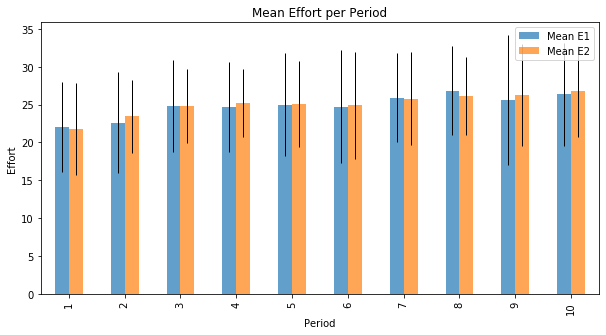

In [43]:
effort_plot(rslt)

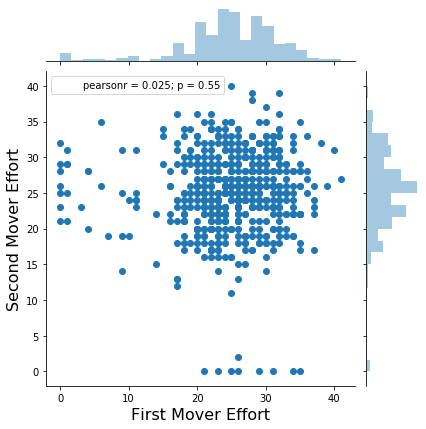

In [47]:
joint_effort(df_2_pref)

In [110]:
result_2 = RandomEffects.from_formula('effort~1+e1+prize+e1timesprize+tt2+tt3+tt4+tt5+tt6+tt7+tt8+tt9+tt10',data=df_2).fit()
result_1 = PanelOLS.from_formula('e2~+e1++prize+e1timesprize+TimeEffects',data=df_2_pref).fit()
result_1

Dep. Variable:,e2,R-squared:,0.0034
Estimator:,PanelOLS,R-squared (Between):,0.0639
No. Observations:,590,R-squared (Within):,0.0114
Date:,"Mon, Jul 06 2020",R-squared (Overall):,0.0626
Time:,14:30:50,Log-likelihood,-1863.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.6509
Entities:,60,P-value,0.5826
Avg Obs:,9.8333,Distribution:,"F(3,577)"
Min Obs:,0.0000,,
Max Obs:,10.0000,F-statistic (robust):,0.6509


In [3]:
# import data 
df <- read_dta("data/paper_data/master_data.dta")
# convert the data frame to a data format recognizable by `plm` 
pdf = pdata.frame(df, index = c("Subject", "Period"))
pdf_pref = subset(pdf, !Subject==302)

split = pdf_pref
split$Period <- as.numeric(split$Period)
#This ensures that we have to different interaction terms
split$last <- ifelse(split$Period <= 5, 0, split$E1timesPrize)
split$first <- ifelse(split$Period > 5, 0, split$E1timesPrize)

In [29]:
# Random Effects Regressions
re = plm(Effort~e1+prize+E1timesPrize+TT2+TT3+TT4+TT5+TT6+TT7+TT8+TT9+TT10, data = pdf, model = "random")
re_pref = plm(Effort~e1+prize+E1timesPrize+TT2+TT3+TT4+TT5+TT6+TT7+TT8+TT9+TT10, data = pdf_pref, model = "random")
# Fixed Effects Regressions
fe = plm(Effort~e1+prize+E1timesPrize+TT2+TT3+TT4+TT5+TT6+TT7+TT8+TT9+TT10, data = pdf, model = "within")
fe_pref = plm(Effort~e1+prize+E1timesPrize+TT2+TT3+TT4+TT5+TT6+TT7+TT8+TT9+TT10, data = pdf_pref, model = "within")
# Robustness
re_pref_wo_prices = plm(Effort~e1+TT2+TT3+TT4+TT5+TT6+TT7+TT8+TT9+TT10, data = pdf_pref, model = "random")
split_interaction = plm(Effort~e1+prize+last+first+TT2+TT3+TT4+TT5+TT6+TT7+TT8+TT9+TT10, data = split, model = "random")

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = Effort ~ e1 + prize + E1timesPrize + TT2 + TT3 + 
    TT4 + TT5 + TT6 + TT7 + TT8 + TT9 + TT10, data = pdf_pref, 
    model = "random")

Balanced Panel: n = 59, T = 10, N = 590

Effects:
                 var std.dev share
idiosyncratic 14.838   3.852 0.447
individual    18.387   4.288 0.553
theta: 0.7267

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-24.22369  -1.64528   0.23273   2.02536  17.18032 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  19.777040   1.400028 14.1262 < 2.2e-16 ***
e1            0.044300   0.049321  0.8982  0.369086    
prize         1.639136   0.601775  2.7238  0.006453 ** 
E1timesPrize -0.048911   0.023485 -2.0826  0.037287 *  
TT2           1.689008   0.709360  2.3810  0.017264 *  
TT3           3.083553   0.712932  4.3252 1.524e-05 ***
TT4           3.448023   0.712646  4.8383 1.309e-06 ***
TT5           

In [20]:
# Hausman Test testing the Random Effects assumption
hausman <- phtest(fe,re)
hausman_pref <- phtest(fe_pref,re_pref)

# Compute the Random Effect Standar Errors

se_re_pref <- ercomp(re_pref)
se_re <- ercomp(re)

# Test eaulity of the interaction term for the first and the last five rounds.

#linearHypothesis(split_interaction, c("first=last"))

                 var std.dev share
idiosyncratic 14.638   3.826 0.339
individual    28.537   5.342 0.661
theta: 0.7791

In [28]:
stargazer(re_pref, re, type="text", title="Random Effects Regressions",
          dep.var.labels="Second Mover Effort",
          omit=c("TT2","TT3","TT4","TT5","TT6","TT7","TT8","TT9","TT10"),
          covariate.labels=c("First Mover Effort", "Prize", "Prize x First Mover effort","Intercept"),
          column.labels=c("Preferred Sample", "Full Sample"),
          no.space=TRUE)
stargazer(fe_pref,fe, type="text", title="Fixed Effects Regressions",
          dep.var.labels="Second Mover Effort",
          omit=c("TT2","TT3","TT4","TT5","TT6","TT7","TT8","TT9","TT10"),
          covariate.labels=c("First Mover Effort", "Prize", "Prize x First Mover effort","Intercept"),
          column.labels=c("Preferred Sample", "Full Sample"),
          no.space=TRUE)


Random Effects Regressions
                               Dependent variable:     
                           ----------------------------
                               Second Mover Effort     
                           Preferred Sample Full Sample
                                 (1)            (2)    
-------------------------------------------------------
First Mover Effort              0.044          0.047   
                               (0.049)        (0.049)  
Prize                          1.639***      1.655***  
                               (0.602)        (0.592)  
Prize x First Mover effort     -0.049**      -0.050**  
                               (0.023)        (0.023)  
Intercept                     19.777***      19.392*** 
                               (1.400)        (1.447)  
-------------------------------------------------------
Observations                     590            600    
R2                              0.137          0.135   
Adjusted R2         

In [20]:
%%R 
example(deltamethod)


dltmth> ## Simple linear regression, E(y) = alpha + beta x 
dltmth> x <- 1:100

dltmth> y <- rnorm(100, 4*x, 5)

dltmth> toy.lm <- lm(y ~ x)

dltmth> estmean <- coef(toy.lm)

dltmth> estvar <- summary(toy.lm)$cov.unscaled * summary(toy.lm)$sigma^2

dltmth> ## Estimate of (1 / (alphahat + betahat))
dltmth> 1 / (estmean[1] + estmean[2])
(Intercept) 
  0.2146277 

dltmth> ## Approximate standard error
dltmth> deltamethod (~ 1 / (x1 + x2), estmean, estvar) 
[1] 0.04328042

dltmth> ## We have a variable z we would like to use within the formula.
dltmth> z <- 1

dltmth> ## deltamethod (~ z / (x1 + x2), estmean, estvar) will not work.
dltmth> ## Instead, build up the formula as a string, and convert to a formula.
dltmth> form <- sprintf("~ %f / (x1 + x2)", z)

dltmth> form
[1] "~ 1.000000 / (x1 + x2)"

dltmth> deltamethod(as.formula(form), estmean, estvar)
[1] 0.04328042


In [119]:
calc_moments = {
    'effort_std': effort_std,
    'corr_round_lag1': calc_autocorrelation(lag=1),
    'corr_round_lag2': calc_autocorrelation(lag=2),
    'mean_period_1': period_average(period=1),
    'mean_period_2': period_average(period=2),
    'mean_period_3': period_average(period=3),
    'mean_period_4': period_average(period=4),
    'mean_period_5': period_average(period=5),
    'mean_period_6': period_average(period=6),
    'mean_period_7': period_average(period=7),
    'mean_period_8': period_average(period=8),
    'mean_period_9': period_average(period=9),
    'mean_period_10': period_average(period=10),
    'cond_corr_e2_prize': cond_corr_e2_prize,
    'cond_corr_e2_e1': cond_corr_e2_e1,
    'cond_corr_e2_e1timesprize': cond_corr_e2_e1timesprize,
    'low_effort_low_prize': low_effort_low_prize,
    'low_effort_high_prize': low_effort_high_prize,
    'high_effort_low_prize': high_effort_low_prize,
    'high_effort_high_prize': high_effort_high_prize   
}

TypeError: calc_autocorrelation() missing 1 required positional argument: 'df'

In [91]:
observed_moments = {
    'effort_std': effort_std(df_2_pref),
    'corr_round_lag1': calc_autocorrelation(df_2_pref,lag=1),
    'corr_round_lag2': calc_autocorrelation(df_2_pref,lag=2),
    'mean_period_1': period_average(df_2_pref, period=1),
    'mean_period_2': period_average(df_2_pref, period=2),
    'mean_period_3': period_average(df_2_pref, period=3),
    'mean_period_4': period_average(df_2_pref, period=4),
    'mean_period_5': period_average(df_2_pref, period=5),
    'mean_period_6': period_average(df_2_pref, period=6),
    'mean_period_7': period_average(df_2_pref, period=7),
    'mean_period_8': period_average(df_2_pref, period=8),
    'mean_period_9': period_average(df_2_pref, period=9),
    'mean_period_10': period_average(df_2_pref, period=10),
    'cond_corr_e2_prize': cond_corr_e2_prize(df_2_pref),
    'cond_corr_e2_e1': cond_corr_e2_e1(df_2_pref),
    'cond_corr_e2_e1timesprize': cond_corr_e2_e1timesprize(df_2_pref),
    'perc17_cond_corr_e2_prize': j_perc_cond_corr_e2_prize(df_2_pref, perc=17),
    'perc33_cond_corr_e2_prize': j_perc_cond_corr_e2_prize(df_2_pref, perc=33),
    'perc50_cond_corr_e2_prize': j_perc_cond_corr_e2_prize(df_2_pref, perc=50),
    'perc66_cond_corr_e2_prize': j_perc_cond_corr_e2_prize(df_2_pref, perc=66),
    'perc83_cond_corr_e2_prize': j_perc_cond_corr_e2_prize(df_2_pref, perc=83),
    'perc17_cond_corr_e2_e1': j_perc_cond_corr_e2_e1(df_2_pref, perc=17),
    'perc33_cond_corr_e2_e1': j_perc_cond_corr_e2_e1(df_2_pref, perc=33),
    'perc50_cond_corr_e2_e1': j_perc_cond_corr_e2_e1(df_2_pref, perc=50),
    'perc66_cond_corr_e2_e1': j_perc_cond_corr_e2_e1(df_2_pref, perc=66),
    'perc83_cond_corr_e2_e1': j_perc_cond_corr_e2_e1(df_2_pref, perc=83),
    'perc17_cond_corr_e2_e1timesprize': j_perc_cond_corr_e2_e1timesprize(df_2_pref, perc=17),
    'perc33_cond_corr_e2_e1timesprize': j_perc_cond_corr_e2_e1timesprize(df_2_pref, perc=33),
    'perc50_cond_corr_e2_e1timesprize': j_perc_cond_corr_e2_e1timesprize(df_2_pref, perc=50),
    'perc66_cond_corr_e2_e1timesprize': j_perc_cond_corr_e2_e1timesprize(df_2_pref, perc=66),
    'perc83_cond_corr_e2_e1timesprize': j_perc_cond_corr_e2_e1timesprize(df_2_pref, perc=83),   
    'low_effort_low_prize': low_effort_low_prize(df_2_pref),
    'low_effort_high_prize': low_effort_high_prize(df_2_pref),
    'high_effort_low_prize': high_effort_low_prize(df_2_pref),
    'high_effort_high_prize': high_effort_high_prize(df_2_pref),
    'low_effort_prop': low_effort_prop(df_2_pref),
    'high_effort_prop': high_effort_prop(df_2_pref)
}
observed_moments

{'effort_std': 5.8745832443237305,
 'corr_round_lag1': 0.12337959960751589,
 'corr_round_lag2': 0.12054900955060942,
 'mean_period_1': 21.762712478637695,
 'mean_period_2': 23.457626342773438,
 'mean_period_3': 24.830509185791016,
 'mean_period_4': 25.20339012145996,
 'mean_period_5': 25.11864471435547,
 'mean_period_6': 24.898305892944336,
 'mean_period_7': 25.762712478637695,
 'mean_period_8': 26.169490814208984,
 'mean_period_9': 26.25423812866211,
 'mean_period_10': 26.72881317138672,
 'cond_corr_e2_prize': 0.1236141575995363,
 'cond_corr_e2_e1': 0.04149206717166186,
 'cond_corr_e2_e1timesprize': -0.09501348232241309,
 'perc17_cond_corr_e2_prize': -0.29095577621732915,
 'perc33_cond_corr_e2_prize': -0.08250118026521103,
 'perc50_cond_corr_e2_prize': 0.09475994482895361,
 'perc66_cond_corr_e2_prize': 0.26428143435477913,
 'perc83_cond_corr_e2_prize': 0.4819769253630361,
 'perc17_cond_corr_e2_e1': -0.3221111416760052,
 'perc33_cond_corr_e2_e1': -0.15190977093980343,
 'perc50_cond_cor

In [83]:
df_resid = pd.DataFrame(columns=['e2_resid', 'prize_resid'],index=df_2_pref.index)
for label in ['e2','prize']:
    column, formula = f'{label}_resid', f'{label}~e1+e1timesprize'
    df_resid.loc[:,column] = FirstDifferenceOLS.from_formula(formula, data=df_2_pref).fit().resids
df_resid.reset_index(inplace=True)
dfs = dict()
for sub in df_resid['subject'].unique():
    dfs[f'{sub}'] = df_resid.query(f'subject == {sub}')
cond_corr = list()
for key in dfs:
    cond_corr.append(dfs[key]['e2_resid'].corr(dfs[key]['prize_resid']))
np.percentile(cond_corr, 50)

0.12323523246681957

In [84]:
df_resid = pd.DataFrame(columns=['e2_resid', 'prize_resid'],index=df_2_pref.index)
for label in ['e2','prize']:
    column, formula = f'{label}_resid', f'{label}~e1+e1timesprize+TimeEffects'
    df_resid.loc[:,column] = PanelOLS.from_formula(formula, data=df_2_pref).fit().resids
df_resid.reset_index(inplace=True)
dfs = dict()
for sub in df_resid['subject'].unique():
    dfs[f'{sub}'] = df_resid.query(f'subject == {sub}')
cond_corr = list()
for key in dfs:
    cond_corr.append(dfs[key]['e2_resid'].corr(dfs[key]['prize_resid']))
correlation_s = pd.Series(cond_corr)
np.percentile(cond_corr, 50)
correlation_s.mean()

0.11900800100441096